In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image

# from gmm_ot import *
from src.patch import *
from src.gaussian_texture import *
import src.semidiscrete_ot as sdot
import pandas as pd
import src.texto as texto
import time

In [ ]:
# Load input image
im0 = np.double(plt.imread('TextureOptimalTransport_MVA/tex/red_peppers.png'))
m,n,nc=im0.shape


dist_R_Z_y_moy = []
dist_R_Z_y_med = []
dist_R_Z_y_weight = []
dist_Z_y_moy = []
dist_Z_y_med = []
dist_Z_y_weight = []

time_start=time.time()

for i in range(5):
    print('\n')
    print('-----------------------------------------')
    print('----- Processing seed no ', i,' ---------')
    print('-----------------------------------------')
    print('\n')
    np.random.seed(i)
    model_mediane = texto.model(im0, 3, 4, 4,mode="BASETEXTO",mediane=True)
    model_moy = texto.model(im0, 3, 4, 4,mode="BASETEXTO")   
    model_weight = texto.model(im0, 3, 4, 4,mode="BASETEXTO",recomp_weight=True) 
    dist_R_Z_y_med.append(model_mediane.dist_R_Z_y)
    dist_R_Z_y_moy.append(model_moy.dist_R_Z_y)
    dist_R_Z_y_weight.append(model_weight.dist_R_Z_y)

    dist_Z_y_med.append(model_mediane.dist_Z_y)
    dist_Z_y_moy.append(model_moy.dist_Z_y)
    dist_Z_y_weight.append(model_weight.dist_Z_y)
    print("Time elapsed after seed ",i," : ",(time.time()-time_start)/60," minutes")

dist_R_Z_y_moy = np.array(dist_R_Z_y_moy)
dist_R_Z_y_med = np.array(dist_R_Z_y_med)
dist_R_Z_y_weight = np.array(dist_R_Z_y_weight)
dist_Z_y_moy = np.array(dist_Z_y_moy)
dist_Z_y_med = np.array(dist_Z_y_med)
dist_Z_y_weight = np.array(dist_Z_y_weight)

# save all the results
np.savez("patchrecomp.npz",dist_R_Z_y_moy=dist_R_Z_y_moy,dist_R_Z_y_med=dist_R_Z_y_med,
         dist_R_Z_y_weight=dist_R_Z_y_weight,dist_Z_y_moy=dist_Z_y_moy,
         dist_Z_y_med=dist_Z_y_med,dist_Z_y_weight=dist_Z_y_weight)


In [4]:
# load all the results
npzfile = np.load("results/patchrecomp_OT.npz")
# incoherences in the keys due to different code versions
# but dist_Z_R_Z_moy contains dist_R_Z_y_moy, ect.
dist_R_Z_y_moy = npzfile["dist_Z_R_Z_moy"]
dist_R_Z_y_med = npzfile["dist_Z_R_Z_med"]
dist_R_Z_y_weight = npzfile["dist_Z_R_Z_weight"]
dist_Z_y_moy = npzfile["dist_X_TvX_moy"]
dist_Z_y_med = npzfile["dist_X_TvX_med"]
dist_Z_y_weight = npzfile["dist_X_TvX_weight"]

In [5]:
avg_dist_R_Z_y_moy = np.mean(dist_R_Z_y_moy,axis=0)
avg_dist_R_Z_y_med = np.mean(dist_R_Z_y_med,axis=0)
avg_dist_R_Z_y_weight = np.mean(dist_R_Z_y_weight,axis=0)
avg_dist_Z_y_moy = np.mean(dist_Z_y_moy,axis=0)
avg_dist_Z_y_med = np.mean(dist_Z_y_med,axis=0)
avg_dist_Z_y_weight = np.mean(dist_Z_y_weight,axis=0)

std_dist_R_Z_y_moy = np.std(dist_R_Z_y_moy,axis=0)
std_dist_R_Z_y_med = np.std(dist_R_Z_y_med,axis=0)
std_dist_R_Z_y_weight = np.std(dist_R_Z_y_weight,axis=0)
std_dist_Z_y_moy = np.std(dist_Z_y_moy,axis=0)
std_dist_Z_y_med = np.std(dist_Z_y_med,axis=0)
std_dist_Z_y_weight = np.std(dist_Z_y_weight,axis=0)

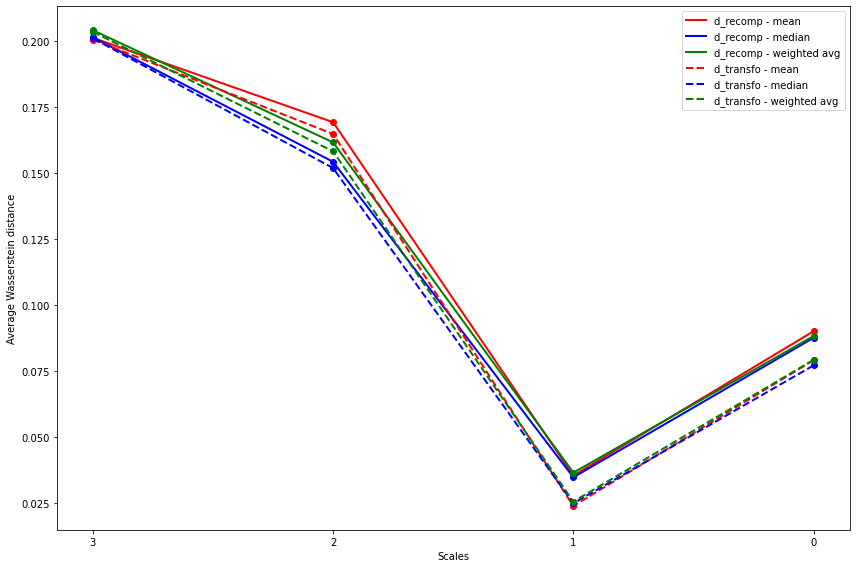

In [6]:
from matplotlib.lines import Line2D

# Grouping data by method
avg_dist_R_Z_y = {
    'mean': avg_dist_R_Z_y_moy,
    'median': avg_dist_R_Z_y_med,
    'weighted avg': avg_dist_R_Z_y_weight
}

avg_dist_Z_y = {
    'mean': avg_dist_Z_y_moy,
    'median': avg_dist_Z_y_med,
    'weighted avg': avg_dist_Z_y_weight
}

std_dist_R_Z_y = {
    'mean': std_dist_R_Z_y_moy,
    'median': std_dist_R_Z_y_med,
    'weighted avg': std_dist_R_Z_y_weight
}

std_dist_Z_y = {
    'mean': std_dist_Z_y_moy,
    'median': std_dist_Z_y_med,
    'weighted avg': std_dist_Z_y_weight
}

fig, ax = plt.subplots(figsize=(12, 8))
distinct_colors = ['red', 'blue', 'green']
metric_line_styles = {'d_recomp': '-', 'd_transfo': '--'}
methods = ['mean', 'median', 'weighted avg']

x_values = [3,2,1,0]
for i, metric in enumerate(['d_recomp', 'd_transfo']):
    for j, method in enumerate(methods):
        color = distinct_colors[j]
        linestyle = metric_line_styles[metric]
        avg_data = avg_dist_R_Z_y[method] if metric == 'd_recomp' else avg_dist_Z_y[method]
        std_data = std_dist_R_Z_y[method] if metric == 'd_recomp' else std_dist_Z_y[method]

        # ax.errorbar(x_values, avg_data, yerr=std_data, 
        #             linestyle=linestyle, color=color,
        #             marker=',', linewidth=2)
        ax.plot(x_values, avg_data, linestyle=linestyle, color=color, marker='o', linewidth=2)

#ax.set_title('Comparison of d_transfo and d2for median, mean and weighted mean')
ax.set_xlabel('Scales')
ax.set_ylabel('Average Wasserstein distance')
ax.set_xticks(x_values)
ax.set_xticklabels(['0', '1', '2', '3'])

# Custom legend
legend_elements = [
    Line2D([0], [0], color=distinct_colors[j], lw=2, linestyle=metric_line_styles[metric], 
           label=f'{metric} - {methods[j]}') for i, metric in enumerate(['d_recomp', 'd_transfo']) for j in range(3)
]

ax.legend(handles=legend_elements)

plt.tight_layout()
plt.show()
